## Testing 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('whitegrid')

# ignore Deprecation Warning
import warnings 
warnings.filterwarnings("ignore") 


In [2]:
# Read the csv file into a pandas DataFrame
ld = pd.read_csv('DataSets/clean_loan_data_2017_rev.csv', encoding="ISO-8859-1", engine='python')
ld.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,11875,11875.0,36 months,11.44%,391.26,B,B4,Shop foreman,10+ years,MORTGAGE,...,25.0,0,0,319205,61637,24300,56205,N,Cash,N
1,1500,1500.0,36 months,5.32%,45.18,A,A1,Auto Technician,3 years,MORTGAGE,...,0.0,0,0,163700,10658,14000,5200,N,Cash,N
2,8500,8500.0,36 months,13.99%,290.47,C,C3,Sr Systems Engineer,6 years,MORTGAGE,...,66.7,0,0,223695,41040,8500,58463,N,Cash,N
3,10000,10000.0,36 months,12.74%,335.69,C,C1,Network Administrator,4 years,MORTGAGE,...,50.0,0,0,227789,33853,8000,39787,N,Cash,N
4,20000,20000.0,60 months,15.99%,486.26,C,C5,Instructor,1 year,RENT,...,66.7,0,0,58808,38893,37400,15508,N,Cash,N


In [3]:
# ld.fillna('0')
# ld.head(2)

In [4]:
ld['loan_status'].value_counts()

2                    9981
4                     294
3                     170
Late (16-30 days)      79
Name: loan_status, dtype: int64

In [5]:
ld['loan_status'].value_counts(normalize=True, dropna=False)

2                    0.948404
4                    0.027936
3                    0.016154
Late (16-30 days)    0.007507
Name: loan_status, dtype: float64

In [6]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = ld.loan_amnt.values.reshape(-1, 1)
y = ld.loan_status.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (10524, 1) (10524, 1)


array([[11875],
       [ 1500],
       [ 8500],
       ...,
       [15000],
       [ 5000],
       [30000]], dtype=int64)

In [7]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=60, n_features=1, random_state=0, noise=4, bias=100.0)

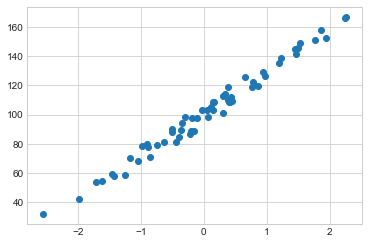

In [8]:
plt.scatter(X, y)

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
model.fit(X, y)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [11]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [28.72821944]
y-axis intercept:  100.57095282715062


In [12]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: 108.33885149409025
Predicted output: 105.02231647484277
Prediction Error: -3.316535019247482


In [95]:
pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]

,Predicted,Actual,Error
0,105.022316,108.338851,-3.316535
1,113.322353,109.180961,4.141392
2,94.677121,88.920894,5.756227
3,135.915013,138.859409,-2.944395
4,127.865301,128.819939,-0.954638
5,90.576056,94.095491,-3.519434
6,43.666197,42.169785,1.496412
7,110.156822,113.952958,-3.796136
8,109.260432,100.994293,8.266138
9,51.552848,53.593745,-2.040896


In [14]:
x_min = X.min()
x_max = X.max()

In [15]:
y_min_actual = y.min()
y_max_actual = y.max()

In [16]:
y_min = 100.57095282715062 + 28.72821944 * x_min
y_max = 100.57095282715062 + 28.72821944 * x_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 31.77047528679899
Calculated Min Value: 27.228101169784026
Actual Max Value: 166.93432935071468
Calculated Max Value: 165.7769617400213


In [17]:
y_min_predicted = model.predict(x_min)
y_max_predicted = model.predict(x_max)
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

Actual Min Value: 31.77047528679899
Predicted Min Value: [27.22810116]
Actual Max Value: 166.93432935071468
Predicted Max Value: [165.77696175]


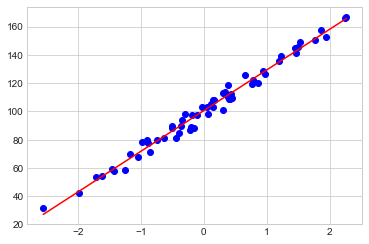

In [18]:
plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 14.73019610280048
R-squared (R2 ): 0.9843590419849737


In [20]:
model.score(X, y)

0.9843590419849737

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
model.score(X_test, y_test)

0.9687200489602834